<a href="https://colab.research.google.com/gist/Buggyex1357/b3f5c8b304b38042fcca9b9c0593429d/cnnexam-19146416.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import glob
import cv2
import os
from os import listdir
from numpy import asarray
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense,Activation,BatchNormalization, Dropout, LSTM, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop, SGD
from keras.utils import np_utils
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [45]:
folder1 = '/content/drive/MyDrive/Fear'                                       #Không chú thích được file này
folder2 = '/content/drive/MyDrive/Happy'                                      #Không chú thích được file này
folder3 = '/content/drive/MyDrive/AItuan14/Emotion/train/Surprise'
photos, labels = list(), list()

for file in listdir(folder1):
  photo = load_img(folder1+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(0)  
for file in listdir(folder2):
  photo = load_img(folder2+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(1)  
  photos, labels = list(), list()
for file in listdir(folder3):
  photo = load_img(folder3+'/'+file, target_size=(150,150))
  photo = img_to_array(photo)
  photos.append(photo)              
  labels.append(2) 
photos = asarray(photos)           
labels = asarray(labels)            
class_name = ['Sợ Hãi','Hạnh phúc','Ngạc nhiên']   
print(photos.shape, labels.shape, class_name)


(0,) (0,) ['Sợ Hãi', 'Hạnh phúc']


In [37]:
x_train, x_test, y_train, y_test = train_test_split(photos, labels, test_size=0.25, random_state=5)   #tạo dữ liệu train 75% và test 25%
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)

(22, 150, 150, 3) (8, 150, 150, 3)
(22,) (8,)


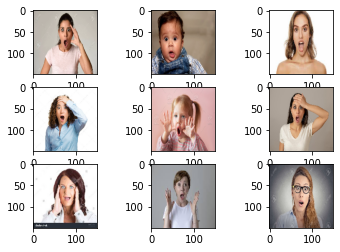

In [38]:
x_train_show = x_train.astype(int)            
import matplotlib.pyplot as plt
from matplotlib.image import imread
for i in range(9):
  plt.subplot(330+i+1)
  plt.imshow(x_train_show[i])
plt.show()

In [39]:
x_train/=255
x_test/=255
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

In [25]:
model = Sequential()
model.add(Conv2D(32,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128,(3,3), activation = 'relu', kernel_initializer='he_uniform',padding='same',))
model.add(MaxPooling2D((2,2)))

In [27]:
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))  #Dense la full connected 
model.add(Dense(3, activation='Softmax'))
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt,loss='categorical_crossentropy',  metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=64,epochs=10,verbose=1,validation_data = (x_test, y_test))
model.save('/content/drive/MyDrive/emotion_CNN.h5')

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


1/1 [==============================] - 1s 846ms/step - loss: 0.5071 - accuracy: 1.0000 - val_loss: 0.4014 - val_accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 58ms/step - loss: 0.4014 - accuracy: 1.0000 - val_loss: 0.2623 - val_accuracy: 1.0000
Epoch 3/10
1/1 [==============================] - 0s 60ms/step - loss: 0.2623 - accuracy: 1.0000 - val_loss: 0.1510 - val_accuracy: 1.0000
Epoch 4/10
1/1 [==============================] - 0s 57ms/step - loss: 0.1510 - accuracy: 1.0000 - val_loss: 0.0823 - val_accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 61ms/step - loss: 0.0823 - accuracy: 1.0000 - val_loss: 0.0448 - val_accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 60ms/step - loss: 0.0448 - accuracy: 1.0000 - val_loss: 0.0251 - val_accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 55ms/step - loss: 0.0251 - accuracy: 1.0000 - val_loss: 0.0146 - val_accuracy: 1.0000
Epoch 8/10
1/1 [=====================

In [28]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ',score[0])
print('test accuracy: ', score[1])

y_pred = model.predict(x_test)
print(y_pred.flatten())
print(y_test)

Test loss:  0.003790932474657893
test accuracy:  1.0
[0.00220916 0.00157457 0.99621624 0.00220916 0.00157457 0.99621624
 0.00220916 0.00157457 0.99621624 0.00220916 0.00157457 0.99621624
 0.00220916 0.00157457 0.99621624 0.00220916 0.00157457 0.99621624
 0.00220916 0.00157457 0.99621624 0.00220916 0.00157457 0.99621624]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


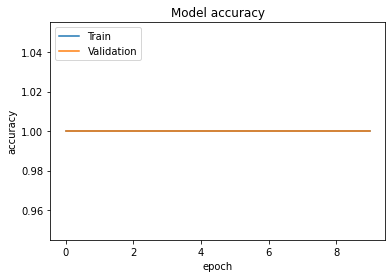

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper left')

[[0.00220916 0.00157457 0.99621624]]
Á, Ngạc nhiên nè!


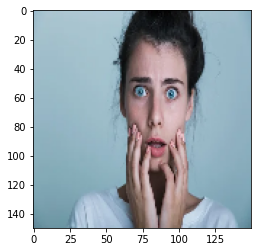

In [30]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
from google.colab.patches import cv2_imshow

img = load_img('/content/drive/MyDrive/AItuan14/Emotion/test/Fear/fear_face_25.jpeg', target_size=(150,150))     #Add ảnh test
plt.imshow(img)
img = img_to_array(img)
img = img.reshape(1,150,150,3)
img = img.astype('float32')
img/=255.0

a = np.argmax(model.predict(img), axis=-1)
print(model.predict(img))
print('Á,',class_name[int(a)],'nè!')